## Text Mining

### Perform Sentimental Analysis on the Elon-musk tweets (Elon-musk.csv).

## 1. Import Necessary Libraries

In [1]:
!pip install textblob

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2. Import Data

In [3]:
tweets_data=pd.read_csv('Elon_musk.csv', engine='python', encoding='latin',error_bad_lines=False)
del tweets_data['Unnamed: 0']
tweets_data  

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## 3. Data Understanding

In [4]:
tweets_data.shape

(1999, 1)

In [5]:
tweets_data.dtypes

Text    object
dtype: object

In [6]:
tweets_data.isna().sum()

Text    0
dtype: int64

## 4. Data Pre-Processing

In [7]:
cleaned_corpus = []
#ps = PorterStemmer()
lz = WordNetLemmatizer()
#Tokenizer for tweets. Removes Twitter username handles from a given twitter text. (Removes @usernames)
tweet_tokenizer=TweetTokenizer(strip_handles=True, reduce_len=True)

for i in range(0,len(tweets_data)):
    review = re.sub(r'http\S+', '', tweets_data['Text'][i])
    review = re.sub('[^A-Za-z]', ' ', review)
    review = review.lower()
    review = tweet_tokenizer.tokenize(review)
    review = [lz.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    cleaned_corpus.append(review)

In [8]:
cleaned_corpus[:25]

['kunalb alien',
 'id aa carmack ray tracing cyberpunk hdr next level tried',
 'joerogan spotify great interview',
 'gtera doge underestimated',
 'teslacn congratulation tesla china amazing execution last year next even',
 'happy new year ox',
 'frodo underdoge thought would fail',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 '',
 'geoffkeighley unrealengine getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issue sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy u f u f',
 'true power haha',
 'freewalletorg crypto wallet give private key avoided cost',
 'freewalletorg app suck',
 'rt spacex nasa selected falcon heavy launch first two element lunar gateway together one mission',
 'ajtourville yes',
 'blkmdl rationaletienne adamklotz pr

In [9]:
tweets_data['cleaned_corpus']=cleaned_corpus
tweets_data.head()

,Text,cleaned_corpus
0,@kunalb11 Im an alien,kunalb alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing cyberpunk hdr next l...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...


## 5. Model Building

In [10]:
tweets_data['Polarity']=tweets_data['cleaned_corpus'].apply(lambda x: TextBlob(x).sentiment[0])
tweets_data.head()

,Text,cleaned_corpus,Polarity
0,@kunalb11 Im an alien,kunalb alien,-0.25
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing cyberpunk hdr next l...,0.00
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.80
3,@gtera27 Doge is underestimated,gtera doge underestimated,0.00
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.20


In [11]:
tweets_data['Sentiments']=tweets_data['Polarity'].apply(lambda x: 'Positive' if x >0 else ('Neutral' if x==0 else 'Negetive'))
tweets_data

,Text,cleaned_corpus,Polarity,Sentiments
0,@kunalb11 Im an alien,kunalb alien,-0.250000,Negetive
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing cyberpunk hdr next l...,0.000000,Neutral
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000,Positive
3,@gtera27 Doge is underestimated,gtera doge underestimated,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.200000,Positive
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sound surreal negative propaganda...,0.152381,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure read ur term amp condition ...,0.500000,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,0.000000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber u f u f,-0.375000,Negetive


In [12]:
tweets_data['Sentiments'].value_counts()

Neutral     925
Positive    859
Negetive    215
Name: Sentiments, dtype: int64

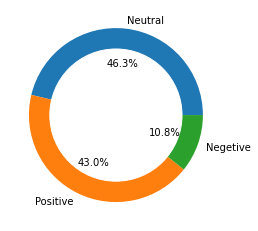

In [13]:
plt.pie(x=tweets_data['Sentiments'].value_counts(), labels=['Neutral','Positive','Negetive'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

### Conclusion:
From the Elon Musk tweet data we got 43% of positive comments and 11% of negetive comments

## =========================================================================